In [1]:
import workdays
from datetime import datetime, timedelta, date
from dateutil.relativedelta import relativedelta
import calendar
import pdblp
from xbbg import blp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Meiryo'

def BDP(T):
    T = [x + " Index" for x in T]
    F = ["name","security_name","name_kanji","px_last","indx_freq","indx_units","quote_units","crncy","last_update_dt","long_comp_name"]
    df = blp.bdp(tickers=T, flds=F).loc[T,:].reset_index()
    return df

def BDH(T,d_from,d_to):
    T1 = [x + " Index" for x in T]
    df = blp.bdh(T1, "px_last", d_from, d_to).reset_index()
    df = df[["index"]+T1]
    df.columns = ["Date"] + T
    return df

def Plot(title="",c="",l="",axhline="",m=""):
    fig, ax = plt.subplots(figsize=(9, 3))
    ax.plot(df["Date"], df[c], label=l, marker=m)
    ax.set_title(title)
    if axhline != "":
        ax.axhline(y=axhline, color='gray', linestyle='--')
    if l != "":
        ax.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
def Plot2(title,c1,c2,l1,l2,m1="",m2="",axhline="",color2='tab:orange'): #Two-axis graph  
    fig, ax = plt.subplots(figsize=(9, 3))
    ax.plot(df["Date"], df[c1], marker=m1, label=l1)
    ax.plot(df["Date"], df[c2], marker=m2, label=l2, color=color2)
    if axhline != "":
        ax.axhline(y=axhline, color='gray', linestyle='--')
    ax.set_title(title)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()

def PlotTW(title,c1,c2,l1,l2): #Two-axis graph
    fig, ax = plt.subplots(figsize=(9, 3))
    ax.plot(df["Date"], df[c1], label=l1)
    ax.set_ylabel(l1)
    ax.legend(loc='upper left')

    ax2 = ax.twinx()
    ax2.plot(df["Date"], df[c2], label=l2, color='lightsteelblue')
    ax2.legend(loc='upper right')
    ax2.set_ylabel(l2)

    ax.set_title(title)
    plt.tight_layout()
    plt.show()

## US

In [2]:
T = ["NAPMPMI","NAPMPRIC","NAPMPROD","NAPMNEWO","NAPMBACK","NAPMSUPL","NAPMINV","NAPMCINV","NAPMEMPL","NAPMEXPT","NAPMIMPT"]   
df_BDP = BDP(T)
df_BDP

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,last_update_dt,long_comp_name,quote_units
0,NAPMPMI Index,ISM Manufacturing PMI SA,ISM PMI,米ISM製造業景況指数(PMI)SA,46.4,Monthly,Value,2023-07-31,ISM Manufacturing PMI SA,S.A.
1,NAPMPRIC Index,ISM Manufacturing Report on Bu,Prices paid,米ISM製造業価格指数NSA,42.6,Monthly,Value,2023-07-31,ISM Manufacturing Report on Business Prices In...,NaN
2,NAPMPROD Index,ISM Manufacturing Report on Bu,Production,全米供給管理協会景気指数 生産,48.3,Monthly,Value,2023-07-31,ISM Manufacturing Report on Business Productio...,NaN
3,NAPMNEWO Index,ISM Manufacturing Report on Bu,New orders,米ISM製造業新規受注指数SA,47.3,Monthly,Value,2023-07-31,ISM Manufacturing Report on Business New Order...,NaN
4,NAPMBACK Index,ISM Manufacturing Report on Bu,Backlog orders,全米供給管理協会景気指数 受注,42.8,Monthly,Value,2023-07-31,ISM Manufacturing Report on Business Backlog o...,NaN
5,NAPMSUPL Index,ISM Manufacturing Report on Bu,Supplier,全米供給管理協会景気指数 供給,46.1,Monthly,Value,2023-07-31,ISM Manufacturing Report on Business Supplier ...,NaN
6,NAPMINV Index,ISM Manufacturing Report on Bu,Inventories,全米供給管理協会景気指数 在庫,46.1,Monthly,Value,2023-07-31,ISM Manufacturing Report on Business Inventori...,NaN
7,NAPMCINV Index,ISM Manufacturing Report on Bu,Inv,ISM 製造業 企業顧客在庫報告(季,48.7,Monthly,Value,2023-07-31,ISM Manufacturing Report on Business Customers...,NaN
8,NAPMEMPL Index,ISM Manufacturing Report on Bu,Employment,米ISM製造業雇用指数SA,44.4,Monthly,Value,2023-07-31,ISM Manufacturing Report on Business Employmen...,NaN
9,NAPMEXPT Index,ISM Manufacturing Report on Bu,Export orders,全米供給管理協会景気指数 輸出,46.2,Monthly,Value,2023-07-31,ISM Manufacturing Report on Business Export Or...,NaN


In [3]:
T = ["NAPMNMI","NAPMNMAN","NAPMNPRC","NAPMNNO","NAPMNBO","NAPMNSD","NAPMNIC","NAPMNIS","NAPMNEMP","NAPMNNEO","NAPMNIMP"]   
df_BDP = BDP(T)
df_BDP

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,last_update_dt,long_comp_name
0,NAPMNMI Index,ISM Services PMI,Services PMI,米ISM非製造業景況指数(NMI),52.7,Monthly,Value,2023-07-31,ISM Services PMI
1,NAPMNMAN Index,ISM Services PMI Report on Bus,Business activity,米ISM非製造業業況指数SA,57.1,Monthly,Value,2023-07-31,ISM Services PMI Report on Business Business A...
2,NAPMNPRC Index,ISM Services PMI Report on Bus,Prices paid,米ISM非製造業価格指数SA,56.8,Monthly,Value,2023-07-31,ISM Services PMI Report on Business Prices SA
3,NAPMNNO Index,ISM Services PMI Report on Bus,New orders,米ISM非製造業新規受注指数SA,55.0,Monthly,Value,2023-07-31,ISM Services PMI Report on Business New Orders SA
4,NAPMNBO Index,ISM Services PMI Report on Bus,Back orders,全米供給管理協会景気指数 非製,52.1,Monthly,Value,2023-07-31,ISM Services PMI Report on Business Backlog of...
5,NAPMNSD Index,ISM Services PMI Report on Bus,Deliveries,米ISM非製造業入荷遅延指数NSA,48.1,Monthly,Value,2023-07-31,ISM Services PMI Report on Business Supplier D...
6,NAPMNIC Index,ISM Services PMI Report on Bus,Inventory change,全米供給管理協会景気指数 非製,50.4,Monthly,Value,2023-07-31,ISM Services PMI Report on Business Inventorie...
7,NAPMNIS Index,ISM Services PMI Report on Bus,Inventory sentiment,全米供給管理協会景気指数 非製,56.6,Monthly,Value,2023-07-31,ISM Services PMI Report on Business Inventory ...
8,NAPMNEMP Index,ISM Services PMI Report on Bus,Employment,米ISM非製造業雇用指数SA,50.7,Monthly,Value,2023-07-31,ISM Services PMI Report on Business Employment SA
9,NAPMNNEO Index,ISM Services PMI Report on Bus,Export orders,全米供給管理協会景気指数 非製,61.1,Monthly,Value,2023-07-31,ISM Services PMI Report on Business New Export...


In [4]:
T = ["DGNOXYOY"]   
df_BDP = BDP(T)
df_BDP

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,last_update_dt,long_comp_name
0,DGNOXYOY Index,US Durable Goods New Orders To,Drable Gds ex Transport YOY SA,US Durable Goods New Orders To,1.11,Monthly,Percent,%,2023-07-31,US Durable Goods New Orders Total ex Transport...


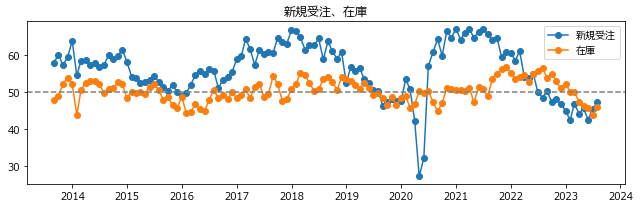

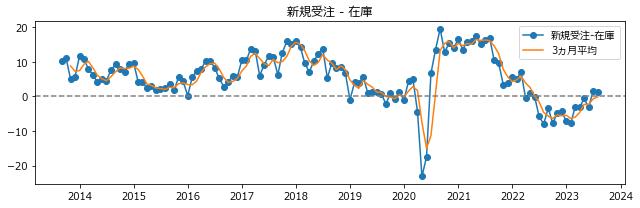

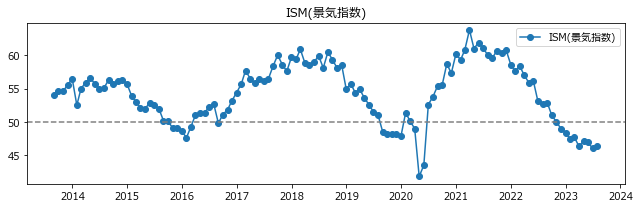

<Figure size 432x288 with 0 Axes>

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,last_update_dt,long_comp_name
0,NAPMPMI Index,ISM Manufacturing PMI SA,ISM PMI,米ISM製造業景況指数(PMI)SA,46.4,Monthly,Value,S.A.,2023-07-31,ISM Manufacturing PMI SA
1,NAPMNEWO Index,ISM Manufacturing Report on Bu,New orders,米ISM製造業新規受注指数SA,47.3,Monthly,Value,NaN,2023-07-31,ISM Manufacturing Report on Business New Order...
2,NAPMINV Index,ISM Manufacturing Report on Bu,Inventories,全米供給管理協会景気指数 在庫,46.1,Monthly,Value,NaN,2023-07-31,ISM Manufacturing Report on Business Inventori...


In [5]:
T = ["NAPMPMI","NAPMNEWO","NAPMINV"] 
d_to = workdays.workday(date.today(), days=0)
d_from = d_to - relativedelta(months=120)
df = BDH(T,d_from,d_to)

df["diff"] = df["NAPMNEWO"] - df["NAPMINV"] 
df["diff_ave"] = df["diff"].rolling(window=3).mean()
df["ratio"] = df["NAPMNEWO"] / df["NAPMINV"] 

Plot2("新規受注、在庫","NAPMNEWO","NAPMINV","新規受注","在庫","o","o",50)
Plot2('新規受注 - 在庫',"diff","diff_ave",'新規受注-在庫',"3ヵ月平均","o","",0) #lightsteelblue"
Plot("ISM(景気指数)","NAPMPMI","ISM(景気指数)",50,"o")

plt.tight_layout()
plt.show()
df_BDP = BDP(T)
df_BDP

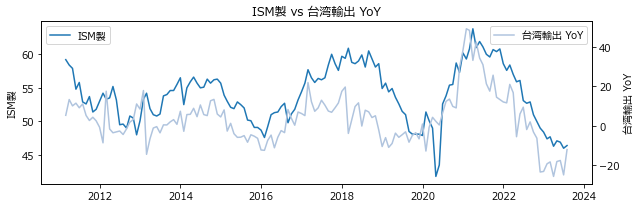

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,last_update_dt,long_comp_name
0,NAPMPMI Index,ISM Manufacturing PMI SA,ISM PMI,米ISM製造業景況指数(PMI)SA,46.4,Monthly,Value,S.A.,2023-07-31,ISM Manufacturing PMI SA
1,TWEOTTLY Index,MOEA Taiwan Export Orders YoY,YoY,MOEA台湾輸出受注(前年比),-12.04,Monthly,Rate,% CHANGE,2023-07-31,MOEA Taiwan Export Orders YoY


In [6]:
T = ["NAPMPMI","TWEOTTLY"]    
d_to = workdays.workday(date.today(), days=0)
d_from = d_to - relativedelta(months=150)
df = BDH(T,d_from,d_to)
PlotTW('ISM製 vs 台湾輸出 YoY',"NAPMPMI","TWEOTTLY",'ISM製','台湾輸出 YoY')
df_BDP = BDP(T)
df_BDP

In [7]:
#SLOOS
T = ["SLDETIGT","SLDETGTS","SLDESPRD","SLDESPDS","SLDEDEMD","SLDEDEMS"] 
df_BDP = BDP(T)
df_BDP

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,crncy,last_update_dt,long_comp_name
0,SLDETIGT Index,Net % of Domestic Respondents,Sup/Dem C&I LoanTight L/M,大･中企業向け商工業ﾛｰﾝの基準を,50.8,Monthly,Rate,% RATIO,USD,2023-07-31,Net % of Domestic Respondents Tightening Stand...
1,SLDETGTS Index,Net % of Domestic Respondents,Net % C&I Loans Tight Stands S,小企業向け商工業ﾛｰﾝの基準を厳,49.2,Monthly,Rate,% RATIO,NaN,2023-07-31,Net % of Domestic Respondents Tightening Stand...
2,SLDESPRD Index,Net % of Dom Respond Inc Sprea,Sup/Dem C&I LoanSpreads,大･中企業向け貸し出しｽﾌﾟﾚｯﾄﾞを,68.3,Monthly,Rate,% RATIO,USD,2023-07-31,Net % of Dom Respond Inc Spreads of Loan Rates...
3,SLDESPDS Index,Net % of Domestic Respondents,Net % COF Spread Loan Rates Sm,大･中企業向け貸し出しｽﾌﾟﾚｯﾄﾞを,66.1,Monthly,Rate,% RATIO,NaN,2023-07-31,Net % of Domestic Respondents Increasing Sprea...
4,SLDEDEMD Index,Net % of Dom Respond Reporting,Sup/Dem C&I LoanDemand,大･中企業向け商工業ﾛｰﾝの需要増,-51.6,Monthly,Rate,% CHANGE,USD,2023-07-31,Net % of Dom Respond Reporting Stronger Demand...
5,SLDEDEMS Index,Net % of Domestic Respondents,Net % Strong Demd C&I Loans S,小企業向け商工業ﾛｰﾝの需要増加,-47.5,Monthly,Rate,% RATIO,NaN,2023-07-31,Net % of Domestic Respondents Reporting Strong...


In [8]:
#SLOOS
T = ["SBOITOTL","SBOIHIRE","SBOIBUSC","SBOIUNCR"] 
df_BDP = BDP(T)
df_BDP

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,last_update_dt,long_comp_name,crncy
0,SBOITOTL Index,NFIB Small Business Optimism I,Overall,中小企業楽観指数,91.9,Monthly,Value,SEASONALLY ADJ.,2023-07-31,NFIB Small Business Optimism Index,NaN
1,SBOIHIRE Index,NFIB Small Business Hiring Pla,Hiring,中小企業雇用計画,17.0,Monthly,Value,NaN,2023-07-31,NFIB Small Business Hiring Plans Index,USD
2,SBOIBUSC Index,NFIB Small Business Outlook fo,Business,中小企業景況感,-30.0,Monthly,Value,SEASONALLY ADJ.,2023-07-31,NFIB Small Business Outlook for General Busine...,USD
3,SBOIUNCR Index,NFIB Small Business Uncertaint,Uncertainty Index,NFIB Small Business Uncertaint,80.0,Monthly,Value,Uncertaint,2023-07-31,NFIB Small Business Uncertainty Index,USD


## China
http://www.pbc.gov.cn/goutongjiaoliu/113456/113469/4975649/2023062915254732962.pdf <br>
https://note.com/happy_talent/n/n65c931276659   


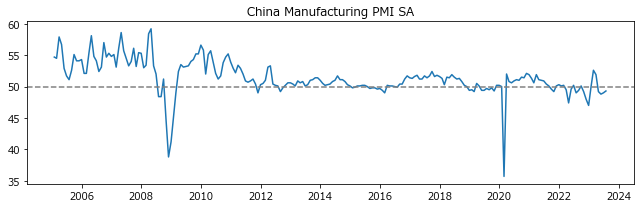

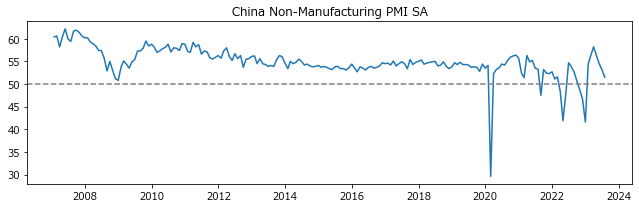

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,last_update_dt,long_comp_name
0,CPMINDX Index,China Manufacturing PMI SA,Manufacturing SA,中国 製造業購買担当者指数 季調,49.3,Monthly,Percent,Points,2023-07-31,China Manufacturing PMI SA
1,CPMINMAN Index,China Non-Manufacturing PMI SA,Non-Manufacturing SA,中国 非製造業PMI(季調済),51.5,Monthly,Value,Points,2023-07-31,China Non-Manufacturing PMI SA
2,CPMICOMP Index,China Composite PMI Output SA,China Composite PMI Output SA,中国ｺﾝﾎﾟｼﾞｯﾄPMI生産高(季調済),51.1,Monthly,Value,Points,2023-07-31,China Composite PMI Output SA


In [9]:
# PMI    
T  = ["CPMINDX","CPMINMAN","CPMICOMP"]
d_to = workdays.workday(date.today(), days=0)
# d_from = d_to - relativedelta(months=350)
d_from = date(2005, 1, 1)
df = BDH(T,d_from,d_to)
Plot("China Manufacturing PMI SA","CPMINDX","",50)
Plot("China Non-Manufacturing PMI SA","CPMINMAN","",50)
df_BDP = BDP(T)
df_BDP

In [10]:
def BDH_List():
    tmp = df.T.copy()
    tmp.columns = [date.astype('datetime64[M]').astype(str).replace('-', '/') for date in df["Date"].values]
    tmp = tmp.iloc[1:,-13:].iloc[:, ::-1]
    tmp.index = df_BDP["security_name"].values
    return tmp
BDH_List()

,2023/07,2023/06,2023/05,2023/04,2023/03,2023/02,2023/01,2022/12,2022/11,2022/10,2022/09,2022/08,2022/07
Manufacturing SA,49.3,49.0,48.8,49.2,51.9,52.6,50.1,47.0,48.0,49.2,50.1,49.4,49.0
Non-Manufacturing SA,51.5,53.2,54.5,56.4,58.2,56.3,54.4,41.6,46.7,48.7,50.6,52.6,53.8
China Composite PMI Output SA,51.1,52.3,52.9,54.4,57.0,56.4,52.9,42.6,47.1,49.0,50.9,51.7,52.5


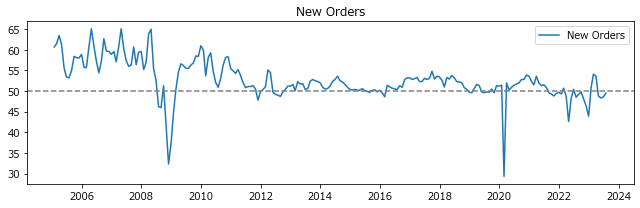

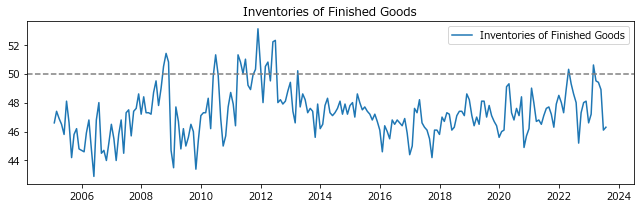

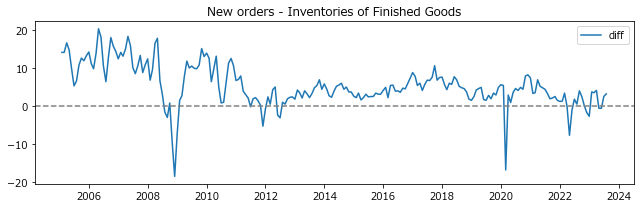

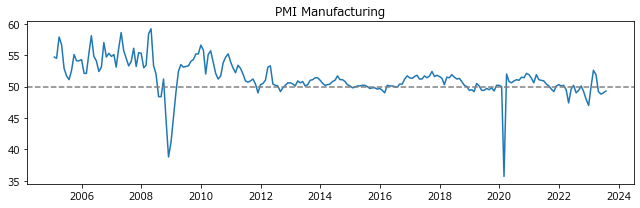

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,last_update_dt,long_comp_name
0,CPMINDX Index,China Manufacturing PMI SA,Manufacturing SA,中国 製造業購買担当者指数 季調,49.3,Monthly,Percent,Points,2023-07-31,China Manufacturing PMI SA
1,CPMIPROD Index,China Output PMI SA,Output SA,中国 製造業購買担当者指数 生産,50.2,Monthly,Value,Points,2023-07-31,China Output PMI SA
2,CPMINORD Index,China New Orders PMI SA,New Orders SA,中国 製造業購買担当者指数 新規,49.5,Monthly,Value,Points,2023-07-31,China New Orders PMI SA
3,CPMIIRAM Index,China Inventories of Raw Mater,China Inventories PMI,中国 製造業購買担当者指数 原材,48.2,Monthly,Value,Points,2023-07-31,China Inventories of Raw Materials PMI SA
4,CPMIEMPL Index,China Employment PMI SA,Employment SA,中国 製造業購買担当者指数 雇用,48.1,Monthly,Value,Points,2023-07-31,China Employment PMI SA
5,CPMISUPL Index,China Suppliers' Delivery Time,Supplier's Delivery Time SA,中国 製造業購買担当者指数 ｻﾌﾟﾗ,50.5,Monthly,Value,Points,2023-07-31,China Suppliers' Delivery Time PMI SA
6,CPMINEXO Index,China New Export Orders PMI SA,New Export Orders SA,中国 製造業購買担当者指数 新規,46.3,Monthly,Value,Points,2023-07-31,China New Export Orders PMI SA
7,CPMIIMPS Index,China Imports PMI SA,Imports SA,中国 製造業購買担当者指数 輸入,46.8,Monthly,Value,Points,2023-07-31,China Imports PMI SA
8,CPMIPVOL Index,China Purchasing of Inputs PMI,Purchasing of Inputs SA,中国 製造業購買担当者指数 購買,49.5,Monthly,Value,Points,2023-07-31,China Purchasing of Inputs PMI SA
9,CPMIPRXP Index,China Input Prices PMI SA,China Input Prices PMI SA,中国 製造業購買担当者指数 購買,52.4,Monthly,Value,Points,2023-07-31,China Input Prices PMI SA


In [11]:
# PMI Manufacturing
T  = ["CPMINDX","CPMIPROD","CPMINORD","CPMIIRAM","CPMIEMPL","CPMISUPL","CPMINEXO","CPMIIMPS",
      "CPMIPVOL","CPMIPRXP","CPMIPPI","CPMIIFGS","CPMINDOD","CPMIBEXP","CPMILCO","CPMIMCO","CPMISCO"]
d_to = workdays.workday(date.today(), days=0)
d_from = date(2005, 1, 1)
df = BDH(T,d_from,d_to)

df["diff"] = df["CPMINORD"] - df["CPMIIFGS"]
Plot("New Orders","CPMINORD","New Orders",50)
Plot("Inventories of Finished Goods","CPMIIFGS","Inventories of Finished Goods",50)
Plot("New orders - Inventories of Finished Goods","diff","diff",0)
Plot("PMI Manufacturing","CPMINDX","",50)

df_BDP = BDP(T)
df_BDP

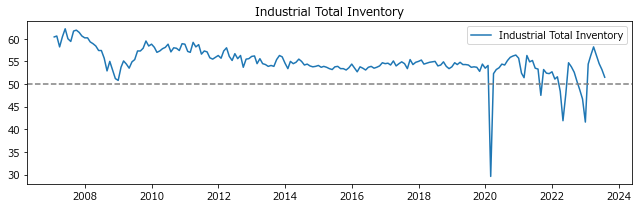

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,last_update_dt,long_comp_name
0,CPMINMAN Index,China Non-Manufacturing PMI SA,Non-Manufacturing SA,中国 非製造業PMI(季調済),51.5,Monthly,Value,Points,2023-07-31,China Non-Manufacturing PMI SA
1,CPMINMNO Index,China Non-Manufacturing PMI -,N-Manu New Orders,China Non-Manufacturing PMI -,48.1,Monthly,Value,Points,2023-07-31,China Non-Manufacturing PMI - New Orders Index SA
2,CPMINNOA Index,China Non-Manufacturing PMI -,N-Manu New Export Orders SA,China Non-Manufacturing PMI -,47.7,Monthly,Value,Points,2023-07-31,China Non-Manufacturing PMI - New Export Order...
3,CPMINMSP Index,China Non-Manufacturing PMI -,N-Manu Subsciption Price,China Non-Manufacturing PMI -,49.7,Monthly,Value,Points,2023-07-31,China Non-Manufacturing PMI - Subscription Pri...
4,CPMINEMP Index,China Non-Manufacturing PMI -,N-Manu Employment,China Non-Manufacturing PMI -,46.6,Monthly,Value,Points,2023-07-31,China Non-Manufacturing PMI - Employment Index SA
5,CPMINMBP Index,China Non-Manufacturing PMI -,N-Manu Business Activities Exp,China Non-Manufacturing PMI -,59.0,Monthly,Value,Points,2023-07-31,China Non-Manufacturing PMI - Business Activit...
6,CPMINMII Index,China Non-Manufacturing PMI -,N-Manu Intermediate Input,China Non-Manufacturing PMI -,50.8,Monthly,Value,Points,2023-07-31,China Non-Manufacturing PMI - Intermediate Inp...
7,CPMINBLO Index,China Non-Manufacturing PMI -,N-Manu Backlogs of Orders SA,China Non-Manufacturing PMI -,43.8,Monthly,Value,Points,2023-07-31,China Non-Manufacturing PMI - Backlogs of Orde...
8,CPMINVNR Index,China Non-Manufacturing PMI -,N-Manu Inventories SA,China Non-Manufacturing PMI -,45.9,Monthly,Value,Points,2023-07-31,China Non-Manufacturing PMI - Inventories SA
9,CPMINSPL Index,China Non-Manufacturing PMI -,N-Manu Supplier's DeliveryTime,China Non-Manufacturing PMI -,51.4,Monthly,Value,Points,2023-07-31,China Non-Manufacturing PMI - Suppliers' Deliv...


In [12]:
#PMI non-Manufacturing
T  = ["CPMINMAN","CPMINMNO","CPMINNOA","CPMINMSP","CPMINEMP",
      "CPMINMBP","CPMINMII","CPMINBLO","CPMINVNR","CPMINSPL"]
d_to = workdays.workday(date.today(), days=0)
# d_from = d_to - relativedelta(months=350)
d_from = date(2005, 1, 1)
df = BDH(T,d_from,d_to)
Plot("Industrial Total Inventory","CPMINMAN","Industrial Total Inventory",50)
df_BDP = BDP(T)
df_BDP

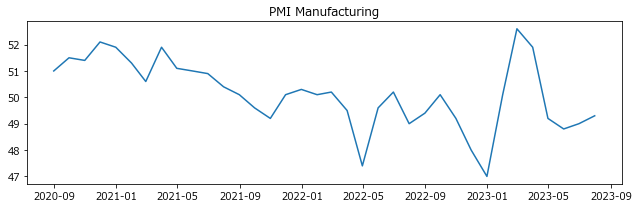

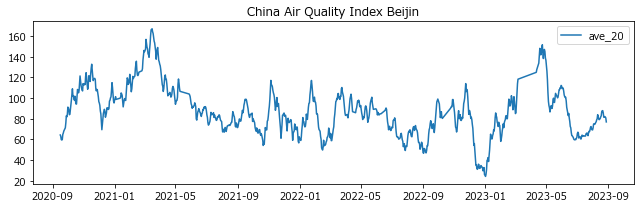

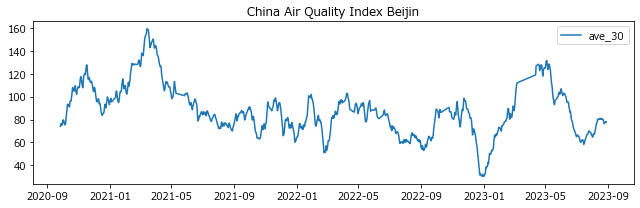

,index,name,security_name,name_kanji,px_last,indx_freq,last_update_dt,long_comp_name
0,CAQIBEJI Index,China Air Quality Index Beijin,CN AQI Beijing,China Air Quality Index Beijin,37.0,Intraday,2023-08-28,China Air Quality Index Beijing


In [13]:
# ISM vs PM2.5
T  = ["CPMINDX"]
d_to = workdays.workday(date.today(), days=0)
d_from = d_to - relativedelta(months=36)
df = BDH(T,d_from,d_to)
Plot("PMI Manufacturing","CPMINDX","")

T  = ["CAQIBEJI"]
df = BDH(T,d_from,d_to)
df["ave20"] = df["CAQIBEJI"].rolling(window=20).mean()
df["ave30"] = df["CAQIBEJI"].rolling(window=30).mean()
Plot("China Air Quality Index Beijin","ave20","ave_20")
Plot("China Air Quality Index Beijin","ave30","ave_30")
df_BDP = BDP(T)
df_BDP

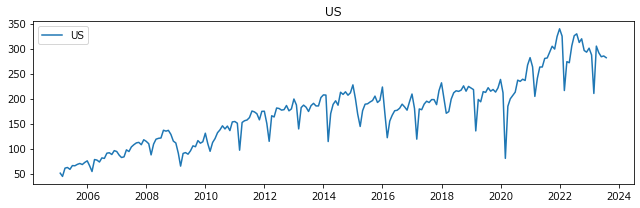

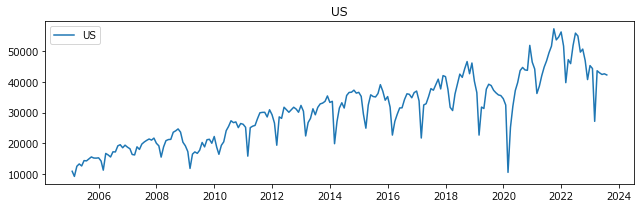

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,crncy,last_update_dt,long_comp_name
0,CNFREXP$ Index,China Export Trade,Export,中国 輸出貿易,281.756,Monthly,Value,Billion,USD,2023-07-31,China Export Trade
1,CNTSECN Index,China Export Trade CNY,China Export Trade CNY,China Export Trade CNY,2015.99,Monthly,Value,Billion,CNY,2023-07-31,China Export Trade CNY
2,CHEXUS Index,China Exports to US,US,中国 輸出 米国,42312.85,Monthly,Value,Million,USD,2023-07-31,China Exports to US
3,CHEXCA Index,China Exports to Canada,Canada,中国 輸出 ｶﾅﾀﾞ,3778.266,Monthly,Value,Million,USD,2023-07-31,China Exports to Canada
4,CHEXHK Index,China Exports to Hong Kong,Hong Kong,中国 輸出 香港,21641.466,Monthly,Value,Million,USD,2023-07-31,China Exports to Hong Kong
5,CHEXJPN Index,China Exports to Japan,Japan,中国 輸出 日本,12952.797,Monthly,Value,Million,USD,2023-07-31,China Exports to Japan
6,CHEXKR Index,China Exports to Korea,South Korea,中国 輸出 韓国,11713.168,Monthly,Value,Million,USD,2023-07-31,China Exports to Korea
7,CHEXTW Index,China Exports to Taiwan,Taiwan,中国 輸出 台湾,5609.217,Monthly,Value,Million,USD,2023-07-31,China Exports to Taiwan
8,CHEXIN Index,China Exports to India,India,中国 輸出 ｲﾝﾄﾞ,10151.676,Monthly,Value,Million,USD,2023-07-31,China Exports to India
9,CHEXASEA Index,China Exports to Association o,Asstn of S East Asian Nations,China Exports to Association o,41773.59,Monthly,Value,Millions,USD,2023-07-31,China Exports to Association of Southeast Asia...


In [14]:
#Export
T  = ["CNFREXP$","CNTSECN","CHEXUS","CHEXCA","CHEXHK","CHEXJPN",
    "CHEXKR","CHEXTW","CHEXIN","CHEXASEA","CHEXEU","CHEXGB","CHEXRU"]
d_to = workdays.workday(date.today(), days=0)
# d_from = d_to - relativedelta(months=350)
d_from = date(2005, 1, 1)
df = BDH(T,d_from,d_to)
Plot("US","CNFREXP$","US")
Plot("US","CHEXUS","US")
df_BDP = BDP(T)
df_BDP

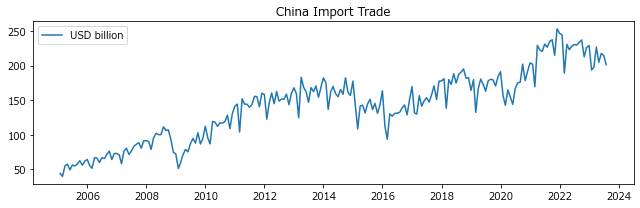

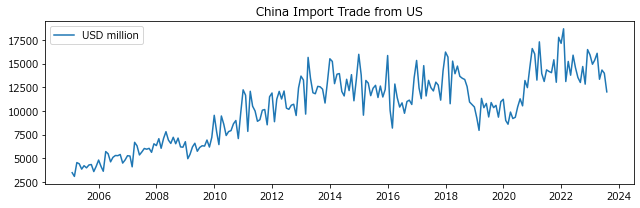

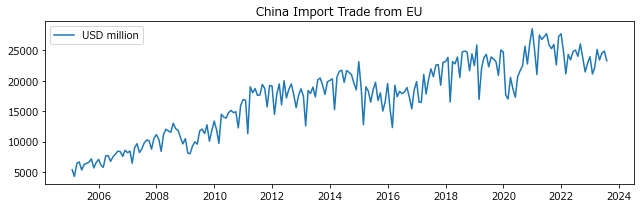

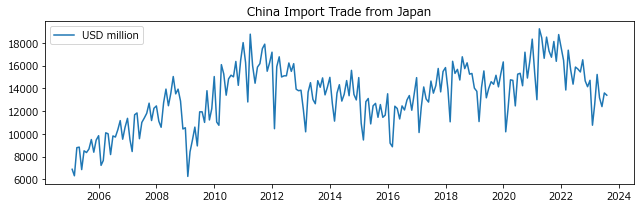

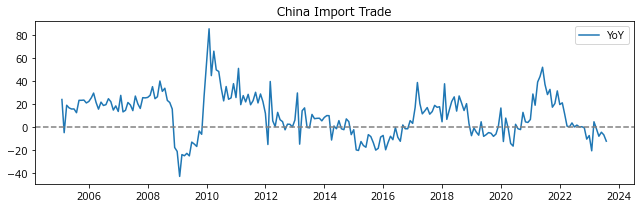

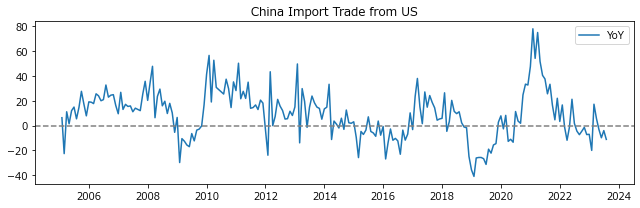

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,crncy,last_update_dt,long_comp_name
0,CNFRIMP$ Index,China Import Trade,Import,中国 輸入貿易,201.159,Monthly,Value,Billion,USD,2023-07-31,China Import Trade
1,CHTIUS Index,China Imports from US,US,中国 輸入 米国,12008.756,Monthly,Value,Million,USD,2023-07-31,China Imports from US
2,CHTIEU Index,China Imports from European Un,European Union,China Imports from European Un,23283.66,Monthly,Value,Millions,USD,2023-07-31,China Imports from European Union
3,CHTIJPN Index,China Imports from Japan,Japan,中国 輸入 日本,13405.28,Monthly,Value,Million,USD,2023-07-31,China Imports from Japan
4,CNFRIMPY Index,China Import Trade USD YoY,Import YoY,中国 輸入貿易USD前年比,-12.4,Monthly,Rate,% CHANGE,NaN,2023-07-31,China Import Trade USD YoY
5,CHTIUSY Index,China Imports from US - USD Yo,CH IM from US - YoY,China Imports from US - USD Yo,-11.2,Monthly,Rate,%,NaN,2023-07-31,China Imports from US - USD YoY


In [15]:
#Import
T  = ["CNFRIMP$","CHTIUS","CHTIEU","CHTIJPN","CNFRIMPY","CHTIUSY"]


d_to = workdays.workday(date.today(), days=0)
# d_from = d_to - relativedelta(months=350)
d_from = date(2005, 1, 1)
df = BDH(T,d_from,d_to)
Plot("China Import Trade","CNFRIMP$","USD billion")
Plot("China Import Trade from US","CHTIUS","USD million")
Plot("China Import Trade from EU","CHTIEU","USD million")
Plot("China Import Trade from Japan","CHTIJPN","USD million")

Plot("China Import Trade","CNFRIMPY","YoY",0)
Plot("China Import Trade from US","CHTIUSY","YoY",0)
df_BDP = BDP(T)
df_BDP

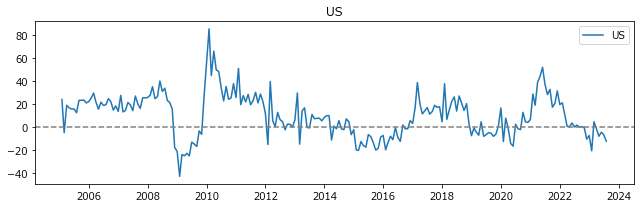

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,last_update_dt,long_comp_name,crncy
0,CNFRIMPY Index,China Import Trade USD YoY,Import YoY,中国 輸入貿易USD前年比,-12.4,Monthly,Rate,% CHANGE,2023-07-31,China Import Trade USD YoY,NaN
1,CNFRBAL$ Index,China Imports & Exports Trade,Trade Balance,中国 貿易収支,80.597,Monthly,Value,Billion,2023-07-31,China Imports & Exports Trade Balance Value,USD
2,CNFREXPY Index,China Export Trade USD YoY,Export YoY,中国 輸出貿易 前年比,-14.5,Monthly,Rate,% CHANGE,2023-07-31,China Export Trade USD YoY,NaN
3,CNTSECNY Index,China Export Trade CNY YoY,China Export Trade CNY YoY,中国 輸出貿易CNY(前年比),-9.2,Monthly,Rate,%,2023-07-31,China Export Trade CNY YoY,NaN
4,CNTSICNY Index,China Import Trade CNY YoY,China Trade Main Im CNY YoY,中国 輸入貿易CNY(前年比),-6.9,Monthly,Rate,%,2023-07-31,China Import Trade CNY YoY,NaN
5,CNTSTCN Index,China Trade Balance CNY,China Trade Main TB CNY,中国貿易収支CNY,575.7,Monthly,Value,Billion,2023-07-31,China Trade Balance CNY,CNY
6,CNDIACRY Index,China FDI Foreign Capital Actu,Total CNY YTD YoY,China FDI Foreign Capital Actu,-4.0,Monthly,Percent,%,2023-07-31,China FDI Foreign Capital Actually Utilized Cu...,NaN
7,SWFTCNY Index,Share of Payments via SWIFT in,Share of Payments in CNY,SWIF経由CNY決済額比率(%),3.06,Monthly,Percent,%,2023-07-31,Share of Payments via SWIFT in CNY (%),NaN


In [16]:
#TradeBalance
T = ["CNFRIMPY","CNFRBAL$","CNFREXPY","CNTSECNY",
     "CNTSICNY","CNTSTCN","CNDIACRY","SWFTCNY"]

d_to = workdays.workday(date.today(), days=0)
# d_from = d_to - relativedelta(months=350)
d_from = date(2005, 1, 1)
df = BDH(T,d_from,d_to)
Plot("US","CNFRIMPY","US",0)
df_BDP = BDP(T)
df_BDP

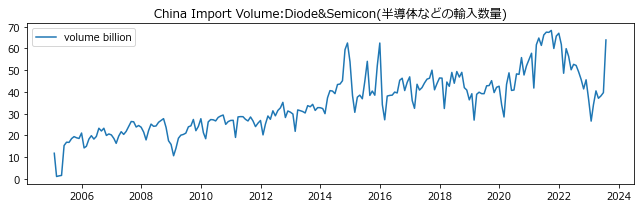

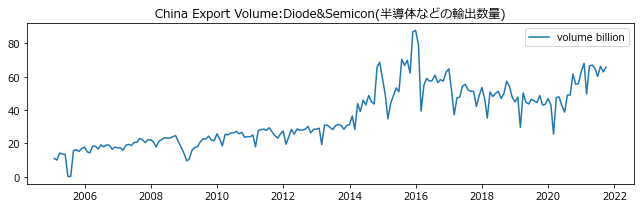

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,last_update_dt,long_comp_name
0,CNIVDIOS Index,China Import Commodity Volume,Diode&Semicon,中国 商品輸入 出来高- 発光素子,63.9,Monthly,Volume,Billion,2023-07-31,China Import Commodity Volume - Diode & Semico...
1,CNEVDIOS Index,China Export Commodity Volume,Diode&Semicon,中国 商品輸出 出来高- 発光素子,65.8,Monthly,Volume,Billion,2021-09-30,China Export Commodity Volume - Diode & Semico...


In [17]:
# Semiconductor 
T = ["CNIVDIOS","CNEVDIOS"]
d_to = workdays.workday(date.today(), days=0)
# d_from = d_to - relativedelta(months=350)
d_from = date(2005, 1, 1)
df = BDH(T,d_from,d_to)
Plot("China Import Volume:Diode&Semicon(半導体などの輸入数量)","CNIVDIOS","volume billion")
Plot("China Export Volume:Diode&Semicon(半導体などの輸出数量)","CNEVDIOS","volume billion")
df_BDP = BDP(T)
df_BDP

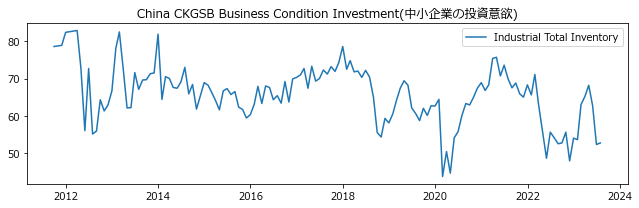

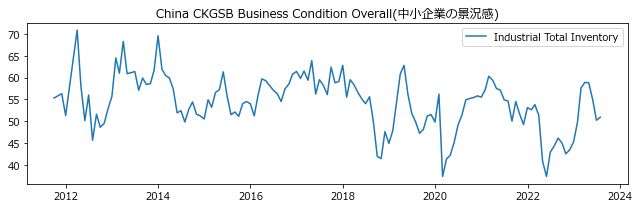

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,last_update_dt,long_comp_name
0,CKGSBCI Index,China CKGSB Business Condition,Business Condition Index,China CKGSB Business Condition,50.9,Monthly,Value,2023-07-31,China CKGSB Business Conditions - Overall Busi...
1,CKGSBCS Index,China CKGSB Business Condition,Corporate Sales Index,China CKGSB Business Condition,59.5,Monthly,Value,2023-07-31,China CKGSB Business Conditions - Corporate Sa...
2,CKGSBCP Index,China CKGSB Business Condition,Corporate Profit Index,China CKGSB Business Condition,47.1,Monthly,Value,2023-07-31,China CKGSB Business Conditions - Corporate Pr...
3,CKGSBCF Index,China CKGSB Business Condition,Corporate Financing Index,China CKGSB Business Condition,47.7,Monthly,Value,2023-07-31,China CKGSB Business Conditions - Corporate Fi...
4,CKGSBIN Index,China CKGSB Business Condition,Inventory Index,China CKGSB Business Condition,48.7,Monthly,Value,2023-07-31,China CKGSB Business Conditions - Inventory Index
5,CKGSBLC Index,China CKGSB Business Condition,Labor Costs Index,China CKGSB Business Condition,72.1,Monthly,Value,2023-07-31,China CKGSB Business Conditions - Labor Costs ...
6,CKGSBAC Index,China CKGSB Business Condition,Overall Costs Index,China CKGSB Business Condition,71.2,Monthly,Value,2023-07-31,China CKGSB Business Conditions - Overall Cost...
7,CKGSBCPI Index,China CKGSB Business Condition,Consumer Prices Index,China CKGSB Business Condition,49.2,Monthly,Value,2023-07-31,China CKGSB Business Conditions - Consumer Pri...
8,CKGSBPPI Index,China CKGSB Business Condition,Producer Prices Index,China CKGSB Business Condition,35.4,Monthly,Value,2023-07-31,China CKGSB Business Conditions - Producer Pri...
9,CKGSBIV Index,China CKGSB Business Condition,Investment Index,China CKGSB Business Condition,52.7,Monthly,Value,2023-07-31,China CKGSB Business Conditions - Investment I...


In [18]:
# 長江商学院: 設備投資意欲(中小企業ターゲット) 
T= ["CKGSBCI","CKGSBCS","CKGSBCP","CKGSBCF","CKGSBIN","CKGSBLC","CKGSBAC",
    "CKGSBCPI","CKGSBPPI","CKGSBIV","CKGSBREC","CKGSBIC"]
d_to = workdays.workday(date.today(), days=0)
d_from = d_to - relativedelta(months=150)
df = BDH(T,d_from,d_to)
Plot("China CKGSB Business Condition Investment(中小企業の投資意欲)","CKGSBIV","Industrial Total Inventory")
Plot("China CKGSB Business Condition Overall(中小企業の景況感)","CKGSBCI","Industrial Total Inventory")
df_BDP = BDP(T)
df_BDP

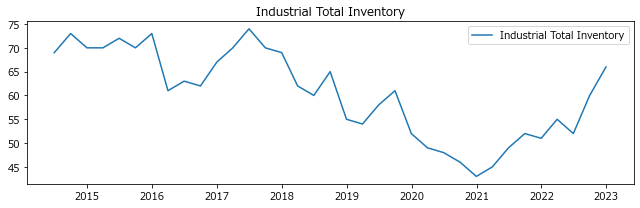

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,last_update_dt,long_comp_name
0,CKGSBUSI Index,China CKGSB Business Sentiment,Business Sentiment Index,China CKGSB Business Sentiment,50.0,Quarterly,Value,2022-12-31,China CKGSB Business Sentiment - Overall
1,CKGSCURR Index,China CKGSB Business Sentiment,Current Operating Conditions,China CKGSB Business Sentiment,53.0,Quarterly,Value,2022-12-31,China CKGSB Business Sentiment - Current Opera...
2,CKGSEXPE Index,China CKGSB Business Sentiment,Expected Operating Conditions,China CKGSB Business Sentiment,52.0,Quarterly,Value,2022-12-31,China CKGSB Business Sentiment - Expected Oper...
3,CKGSINVE Index,China CKGSB Business Sentiment,Investment Timing,China CKGSB Business Sentiment,45.0,Quarterly,Value,2022-12-31,China CKGSB Business Sentiment - Investment Ti...
4,CKGSPROD Index,China CKGSB Business Sentiment,Production,China CKGSB Business Sentiment,36.0,Quarterly,Value,2022-12-31,China CKGSB Business Sentiment - Production
5,CKGSEMPL Index,China CKGSB Business Sentiment,Employment,China CKGSB Business Sentiment,49.0,Quarterly,Value,2022-12-31,China CKGSB Business Sentiment - Employment
6,CKGSPRIC Index,China CKGSB Business Sentiment,Price,China CKGSB Business Sentiment,56.0,Quarterly,Value,2022-12-31,China CKGSB Business Sentiment - Price
7,CKGSELEC Index,China CKGSB Business Sentiment,Electricity Consumption,China CKGSB Business Sentiment,36.0,Quarterly,Value,2022-12-31,China CKGSB Business Sentiment - Electricity C...
8,CKGSINVN Index,China CKGSB Business Sentiment,Inventory,China CKGSB Business Sentiment,35.0,Quarterly,Value,2022-12-31,China CKGSB Business Sentiment - Inventory
9,CKGSOVER Index,China CKGSB Business Sentiment,Over-Supply In Domestic Market,China CKGSB Business Sentiment,97.0,Quarterly,Value,2022-12-31,China CKGSB Business Sentiment - Over-Supply I...


In [19]:
# CKGSB Business Sentiment
T = ["CKGSBUSI","CKGSCURR","CKGSEXPE","CKGSINVE","CKGSPROD","CKGSEMPL",
    "CKGSPRIC","CKGSELEC","CKGSINVN","CKGSOVER","CKGSOVES","CKGSUNIT",
    "CKGSLABO","CKGSRAWM","CKGSLEND" ]

d_to = workdays.workday(date.today(), days=0)
d_from = d_to - relativedelta(months=150)
df = BDH(T,d_from,d_to)
Plot("Industrial Total Inventory","CKGSLEND","Industrial Total Inventory")

df_BDP = BDP(T)
df_BDP

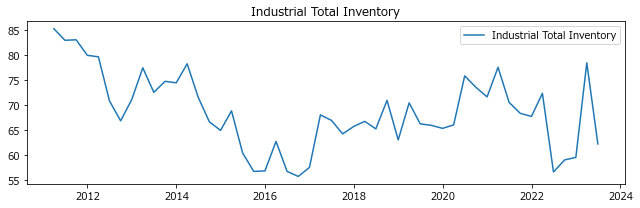

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,last_update_dt,long_comp_name
0,CNBSBMHI Index,People's Bank of China Bankers,Bankers Macroeconomic Heat,People's Bank of China Bankers,37.8,Quarterly,Value,2023-06-30,People's Bank of China Bankers Survey Bankers ...
1,CNBSMONE Index,People's Bank of China Bankers,M.Policy Sentiment,中国人民銀行 銀行調査､金融政策,64.2,Quarterly,Value,2023-06-30,People's Bank of China Bankers Survey Monetary...
2,CNBSLOAN Index,People's Bank of China Bankers,Loan Demand,中国人民銀行 銀行調査 借入需要,62.2,Quarterly,Value,2023-06-30,People's Bank of China Bankers Survey Overall ...
3,CNBSLOM Index,People's Bank of China Bankers,Loan Demand Manuf,People's Bank of China Bankers,64.1,Quarterly,Value,2023-06-30,People's Bank of China Bankers Survey Loan Dem...
4,CNBSINFT Index,People's Bank of China Bankers,Loan Demand Index - Infrastr,People's Bank of China Bankers,61.0,Quarterly,Value,2023-06-30,People's Bank of China Bankers Survey Loan Dem...
5,CNBSLOLE Index,People's Bank of China Bankers,Large Enterprises,People's Bank of China Bankers,55.1,Quarterly,Value,2023-06-30,People's Bank of China Bankers Survey Loan Dem...
6,CNBSLOME Index,People's Bank of China Bankers,Medium Enterprises,People's Bank of China Bankers,58.1,Quarterly,Value,2023-06-30,People's Bank of China Bankers Survey Loan Dem...
7,CNBSLOSE Index,People's Bank of China Bankers,Loan Demand SME,People's Bank of China Bankers,64.5,Quarterly,Value,2023-06-30,People's Bank of China Bankers Survey Loan Dem...
8,CNBSLOAP Index,People's Bank of China Bankers,Loan Approval Climate,People's Bank of China Bankers,55.6,Quarterly,Value,2023-06-30,People's Bank of China Bankers Survey - Confid...
9,CNBSCLMT Index,People's Bank of China Bankers,Banking Industry Climate,中国人民銀行 銀行調査 銀行業務,69.6,Quarterly,Value,2023-06-30,People's Bank of China Bankers Survey Banking ...


In [20]:
#BMH: Bankers Macroeconomic Heat
T = ["CNBSBMHI","CNBSMONE","CNBSLOAN","CNBSLOM","CNBSINFT","CNBSLOLE",
    "CNBSLOME","CNBSLOSE","CNBSLOAP","CNBSCLMT","CNBSPROF"]

d_to = workdays.workday(date.today(), days=0)
d_from = d_to - relativedelta(months=150)
df = BDH(T,d_from,d_to)
Plot("Industrial Total Inventory","CNBSLOAN","Industrial Total Inventory")

df_BDP = BDP(T)
df_BDP

In [21]:
BDH_List()

,2023/06,2023/03,2022/12,2022/09,2022/06,2022/03,2021/12,2021/09,2021/06,2021/03,2020/12,2020/09,2020/06
Bankers Macroeconomic Heat,37.8,40.2,17.4,19.9,17.8,34.4,35.3,38.6,45.9,42.4,33.6,25.6,13.0
M.Policy Sentiment,64.2,67.7,68.0,72.3,69.3,62.8,54.1,54.3,52.9,51.0,58.2,66.0,74.6
Loan Demand,62.2,78.4,59.5,59.0,56.6,72.3,67.7,68.3,70.5,77.5,71.6,73.5,75.8
Loan Demand Manuf,64.1,73.9,62.2,60.6,59.7,70.3,67.0,67.4,68.7,72.2,68.6,69.6,70.6
Loan Demand Index - Infrastr,61.0,71.0,60.6,61.3,58.5,67.3,60.8,63.0,65.1,70.3,65.0,67.7,69.7
Large Enterprises,55.1,64.9,54.6,53.6,51.4,60.3,57.1,56.2,59.1,63.8,59.3,59.5,60.7
Medium Enterprises,58.1,68.2,56.4,55.6,54.2,63.7,60.5,60.7,62.3,66.8,62.9,64.8,66.9
Loan Demand SME,64.5,76.5,62.5,63.8,61.0,74.0,70.5,72.1,72.3,76.5,74.7,76.6,78.6
Loan Approval Climate,55.6,57.7,57.9,57.9,58.0,54.3,51.6,49.7,49.8,51.0,53.6,56.8,60.8
Banking Industry Climate,69.6,71.9,65.8,66.4,66.0,72.1,70.2,70.0,69.6,72.1,67.9,66.0,63.9


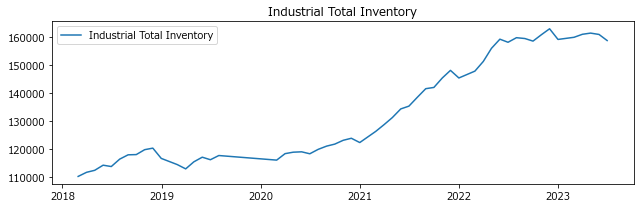

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,crncy,last_update_dt,long_comp_name
0,CINIIE Index,China Industrial Total Invento,CH Ind Tt Inventory IE,China Industrial Total Invento,158734.2,Monthly,Value,100 Millions,CNY,2023-06-30,China Industrial Total Inventory - Industrial ...


In [22]:
T = ["CINIIE"]
d_to = workdays.workday(date.today(), days=0)
d_from = d_to - relativedelta(months=150)
df = BDH(T,d_from,d_to)
Plot("Industrial Total Inventory","CINIIE","Industrial Total Inventory")

df_BDP = BDP(T)
df_BDP

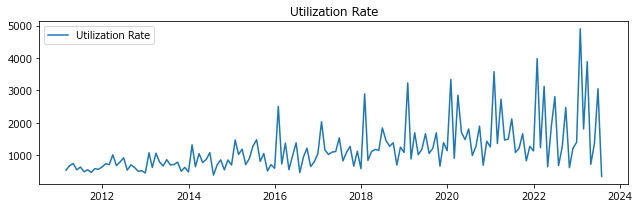

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,crncy,last_update_dt,long_comp_name
0,CNLNASF Index,China All-system Financing Agg,Total Social Finance,中国 全ｼｽﾃﾑ資金調達総額,528.2,Monthly,Value,Billion,CNY,2023-07-31,China All-system Financing Aggregate
1,CNLNNEW Index,China CNY Monthly New Loan,New Loan,中国 月次新規ﾛｰﾝ(CNY),345.95,Monthly,Value,Billion,CNY,2023-07-31,China CNY Monthly New Loan
2,CNMS0YOY Index,China Monthly Money Supply M0,M0 YOY,中国 ﾏﾈｰｻﾌﾟﾗｲ M0 前年比,9.9,Monthly,Rate,% CHANGE,NaN,2023-07-31,China Monthly Money Supply M0 YoY
3,CNMS1YOY Index,China Monthly Money Supply M1,M1 YoY,中国 ﾏﾈｰｻﾌﾟﾗｲ M1 前年比,2.3,Monthly,Rate,% CHANGE,NaN,2023-07-31,China Monthly Money Supply M1 YoY
4,CNMS2YOY Index,China Monthly Money Supply M2,M2 YoY,ﾏﾈｰｻ M2 前年比,10.7,Monthly,Rate,% CHANGE,NaN,2023-07-31,China Monthly Money Supply M2 YoY


In [23]:
T = ["CNLNASF","CNLNNEW","CNMS0YOY","CNMS1YOY","CNMS2YOY"]
d_to = workdays.workday(date.today(), days=0)
d_from = d_to - relativedelta(months=150)
df = BDH(T,d_from,d_to)
Plot("Utilization Rate","CNLNNEW","Utilization Rate")

df_BDP = BDP(T)
df_BDP

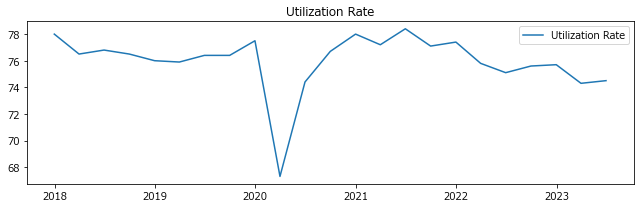

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,last_update_dt,long_comp_name
0,CNURTOTL Index,China Utilization Rate of Indu,CN Indus Utilization Rate,China Utilization Rate of Indu,74.5,Quarterly,Rate,2023-06-30,China Utilization Rate of Industrial Capacity
1,CNURMINI Index,China Utilization Rate of Indu,CN Indus UR Mining&Quarrying,China Utilization Rate of Indu,74.8,Quarterly,Rate,2023-06-30,China Utilization Rate of Industrial Capacity-...
2,CNURMANU Index,China Utilization Rate of Indu,CN Indus UR Manufacturing,China Utilization Rate of Indu,74.8,Quarterly,Rate,2023-06-30,China Utilization Rate of Industrial Capacity-...
3,CNURELEC Index,China Utilization Rate of Indu,CN Indus UR ElecHeatGasWater,China Utilization Rate of Indu,71.4,Quarterly,Rate,2023-06-30,China Utilization Rate of Industrial Capacity-...
4,CNURMICO Index,China Utilization Rate of Indu,CN Indus UR Mining&WashingCoal,China Utilization Rate of Indu,74.5,Quarterly,Rate,2023-06-30,China Utilization Rate of Industrial Capacity-...
5,CNURPTRO Index,China Utilization Rate of Indu,CN Indus UR Petro&Gas,China Utilization Rate of Indu,90.9,Quarterly,Rate,2023-06-30,China Utilization Rate of Industrial Capacity-...
6,CNURFOOD Index,China Utilization Rate of Indu,CN Indus UR Food,China Utilization Rate of Indu,68.1,Quarterly,Rate,2023-06-30,China Utilization Rate of Industrial Capacity-...
7,CNURTEXT Index,China Utilization Rate of Indu,CN Indus UR Textile,China Utilization Rate of Indu,76.9,Quarterly,Rate,2023-06-30,China Utilization Rate of Industrial Capacity-...
8,CNURCHEM Index,China Utilization Rate of Indu,CN Indus UR Chemical,China Utilization Rate of Indu,74.3,Quarterly,Rate,2023-06-30,China Utilization Rate of Industrial Capacity-...
9,CNURMEDI Index,China Utilization Rate of Indu,CN Indus UR Medicines,China Utilization Rate of Indu,76.2,Quarterly,Rate,2023-06-30,China Utilization Rate of Industrial Capacity-...


In [24]:
# Utilization Rate
T = ["CNURTOTL","CNURMINI","CNURMANU","CNURELEC","CNURMICO","CNURPTRO",
     "CNURFOOD","CNURTEXT","CNURCHEM","CNURMEDI","CNURCHEF","CNURNONM",
     "CNURMETL","CNURNONF","CNURGEMH","CNURSPMH","CNURAUTO","CNUREMEP","CNUREQIP"]

d_to = workdays.workday(date.today(), days=0)
d_from = d_to - relativedelta(months=150)
df = BDH(T,d_from,d_to)
Plot("Utilization Rate","CNURTOTL","Utilization Rate")

df_BDP = BDP(T)
df_BDP

In [25]:
BDH_List()

,2023/06,2023/03,2022/12,2022/09,2022/06,2022/03,2021/12,2021/09,2021/06,2021/03,2020/12,2020/09,2020/06
CN Indus Utilization Rate,74.5,74.3,75.7,75.6,75.1,75.8,77.4,77.1,78.4,77.2,78.0,76.7,74.4
CN Indus UR Mining&Quarrying,74.8,75.2,76.5,76.9,76.7,77.0,77.0,76.0,76.1,75.3,75.0,73.9,72.1
CN Indus UR Manufacturing,74.8,74.5,75.8,75.9,75.4,75.9,77.6,77.3,78.8,77.6,78.4,77.2,74.8
CN Indus UR ElecHeatGasWater,71.4,71.9,74.0,72.7,70.6,73.8,75.4,75.3,74.7,74.5,74.3,72.8,70.6
CN Indus UR Mining&WashingCoal,74.5,73.8,75.4,75.0,74.3,74.9,76.4,74.2,73.1,72.5,72.6,71.2,69.6
CN Indus UR Petro&Gas,90.9,91.2,91.3,91.8,92.3,92.4,89.0,90.0,90.3,90.0,90.8,89.4,90.5
CN Indus UR Food,68.1,70.7,71.9,72.0,71.3,71.6,74.5,74.2,72.8,74.2,74.3,74.5,70.4
CN Indus UR Textile,76.9,75.5,76.2,76.7,77.8,78.2,79.2,79.5,80.9,78.3,74.7,76.2,72.7
CN Indus UR Chemical,74.3,75.5,76.0,75.3,77.7,77.9,77.6,77.8,80.0,76.9,77.2,76.2,74.2
CN Indus UR Medicines,76.2,75.2,77.6,74.8,75.1,74.6,77.4,76.6,78.5,76.9,78.5,75.4,74.0


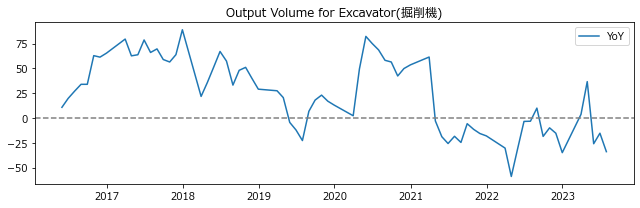

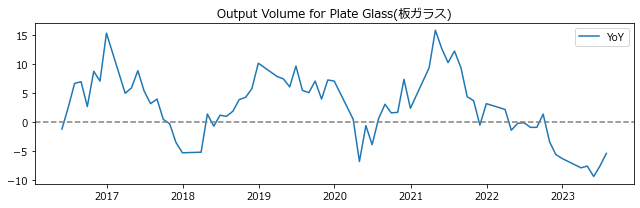

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,last_update_dt,long_comp_name
0,CHMMEXCY Index,China Industrial Output YoY -,Exca YoY,China Industrial Output YoY -,-33.9,Monthly,Percent,%,2023-07-31,China Industrial Output YoY - Excavator
1,CHYXGLAS Index,China Industrial Output YoY -,Plate Glass,中国 工業生産 前年比- 板ｶﾞﾗｽ,-5.4,Monthly,Percent,%,2023-07-31,China Industrial Output YoY - Plate Glass


In [26]:
# https://www.komatsu.jp/ja/-/media/home/ir/library/demand-orders/ja/komtrax.pdf?rev=1b2084a931894a6db346b967d206b1da&hash=7FA0FBE59A28C5E68C47DE37F5B0B517
# 月次Komtraxデータ
T = ["CHMMEXCY","CHYXGLAS"]
d_to = workdays.workday(date.today(), days=0)
# d_from = d_to - relativedelta(months=150)
d_from = date(2016, 5, 1)
df = BDH(T,d_from,d_to)
Plot("Output Volume for Excavator(掘削機)","CHMMEXCY","YoY",0)
Plot("Output Volume for Plate Glass(板ガラス)","CHYXGLAS","YoY",0)
df_BDP = BDP(T)
df_BDP

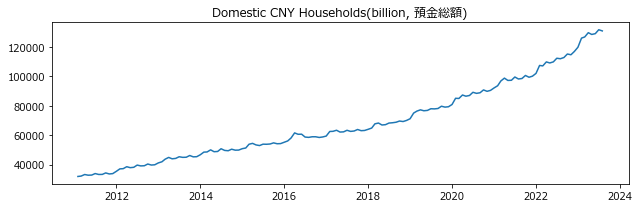

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,crncy,last_update_dt,long_comp_name
0,CHBDPNDT Index,China Domestic CNY Households,RMB HseHold Depo,China Domestic CNY Households,131029.07,Monthly,Value,Billion,CNY,2023-07-31,China Domestic CNY Households Deposits Cum
1,CHPOP Index,China Population Total,Total,中国 総人口,1411.75,Yearly,Quantity,Millions,NaN,2022-12-31,China Population Total


In [27]:
T = ["CHBDPNDT","CHPOP"]
d_to = workdays.workday(date.today(), days=0)
# d_from = d_to - relativedelta(months=150)
d_from = date(2010, 1, 1)
df = BDH(T,d_from,d_to)
Plot("Domestic CNY Households(billion, 預金総額)","CHBDPNDT","")
df_BDP = BDP(T)
df_BDP


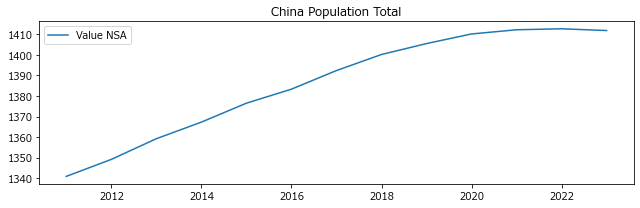

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,last_update_dt,long_comp_name
0,CHPOP Index,China Population Total,Total,中国 総人口,1411.75,Yearly,Quantity,Millions,2022-12-31,China Population Total


In [28]:
T = ["CHPOP"]
d_to = workdays.workday(date.today(), days=0)
# d_from = d_to - relativedelta(months=150)
d_from = date(2010, 1, 1)
df = BDH(T,d_from,d_to)
Plot("China Population Total","CHPOP","Value NSA")
df_BDP = BDP(T)
df_BDP


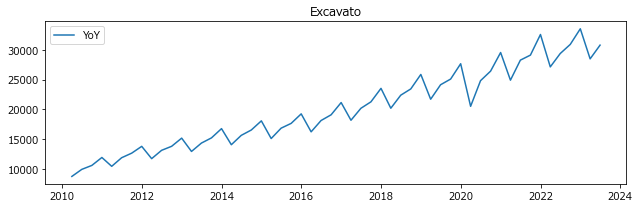

,index,name,security_name,name_kanji,px_last,indx_freq,indx_units,quote_units,crncy,last_update_dt,long_comp_name
0,CNNGPQ$ Index,China GDP Current Price NSA,GDP Qtrly,China GDP Current Price NSA,30803.76,Quarterly,Value,Billion,CNY,2023-06-30,China GDP Current Price NSA


In [29]:
T = ["CNNGPQ$"]
d_to = workdays.workday(date.today(), days=0)
# d_from = d_to - relativedelta(months=150)
d_from = date(2010, 1, 1)
df = BDH(T,d_from,d_to)
Plot("Excavato","CNNGPQ$","YoY")
df_BDP = BDP(T)
df_BDP
